In [11]:
# reference : https://qiita.com/y_itoh/items/004b75add495f1903331

In [12]:
import numpy as np
from sklearn import datasets

from sklearn.neighbors import KNeighborsClassifier # Import the required library for k-NN classifier

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [13]:

# Load the iris dataset
iris = datasets.load_iris()

# Extracting the first two features from the iris dataset
X = iris.data[:, :2]
y = iris.target

In [14]:
# Define the step size for the mesh
h = 0.01

# Define colormaps for the plot
cmap_surface = ListedColormap(['darkblue', 'darkgreen', 'darkred'])
cmap_dot = ListedColormap(['darkblue', 'darkgreen', 'darkred'])

# Define the range for the meshgrid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

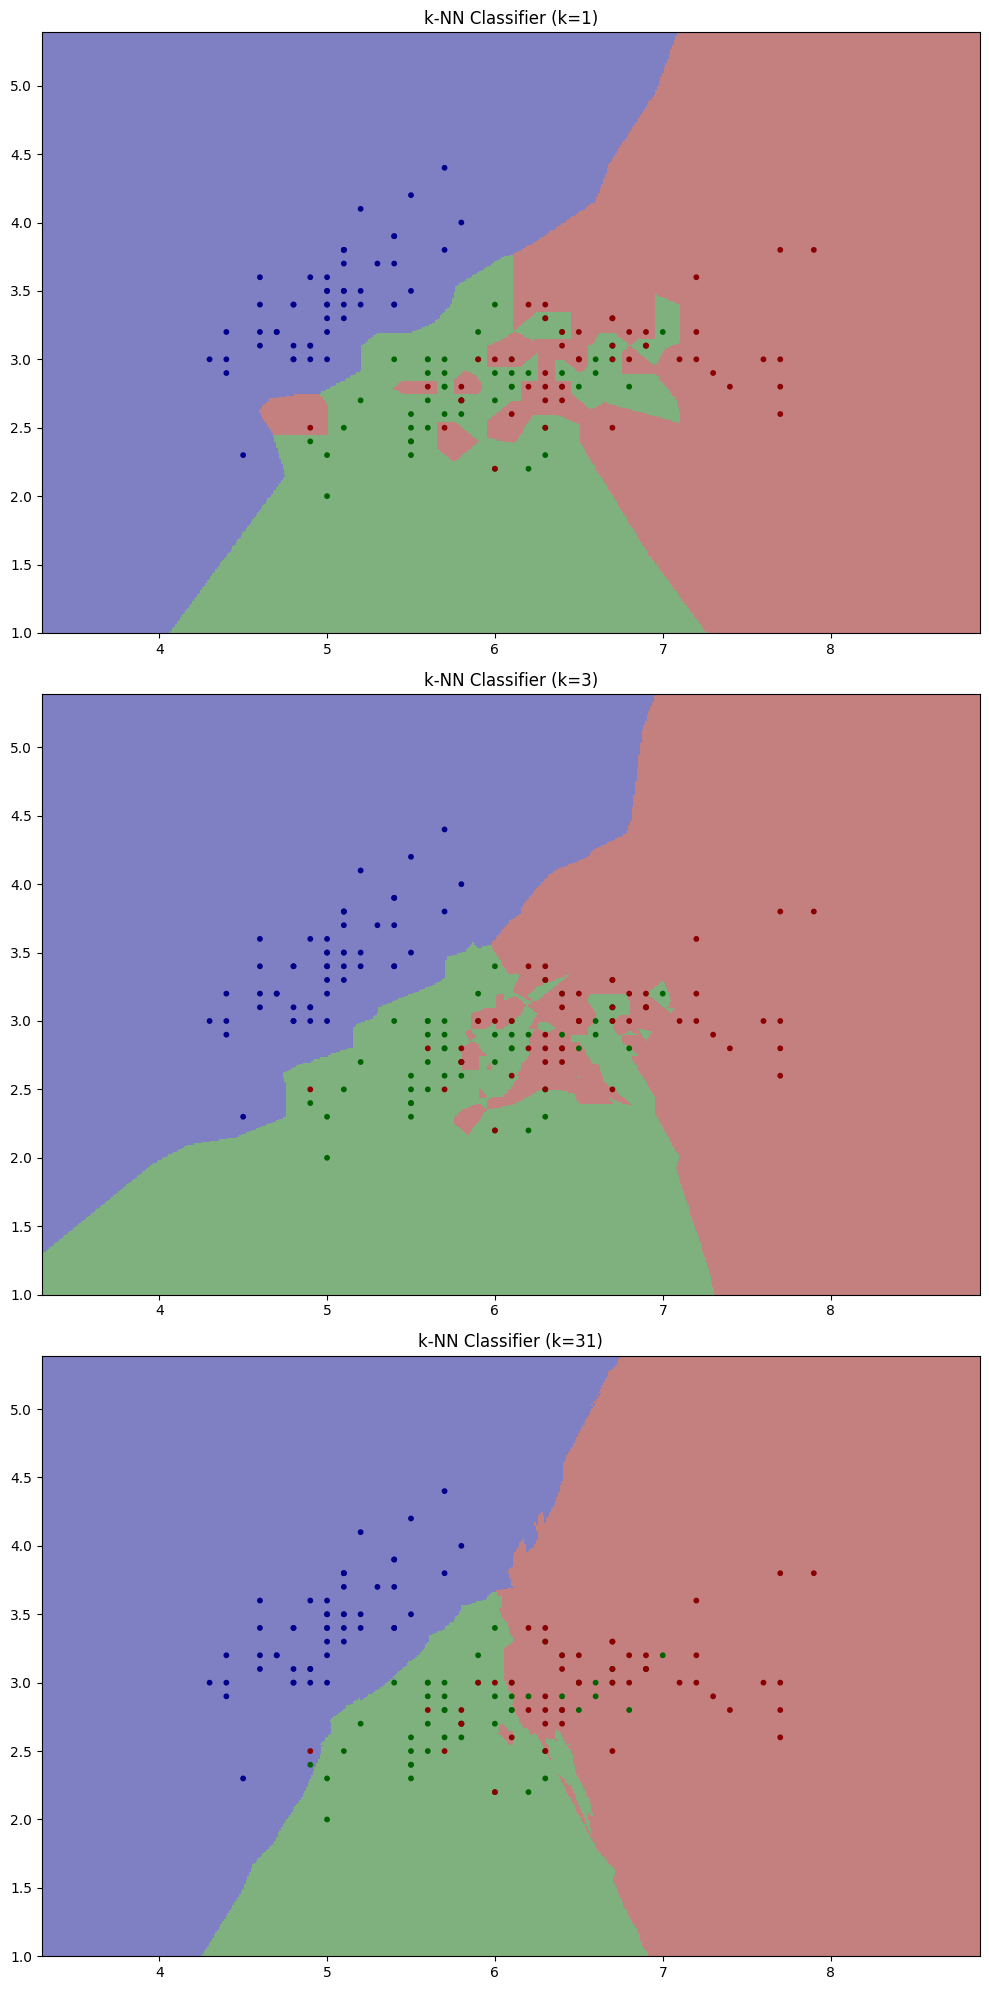

In [15]:
# Define a list of k values
k_list = [1, 3, 31]

# Create a new figure
plt.figure(figsize=(10, 20))

# Loop through each k value and create a subplot for each k value
for i, num_k in enumerate(k_list):
    
    plt.subplot(len(k_list), 1, i + 1)  # Create subplots for each number of neighbors
    
    # Fit the k-NN classifier model
    model = KNeighborsClassifier(n_neighbors=num_k).fit(X, y)
    
    # Predict the classes for each point in the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundaries
    plt.pcolormesh(xx, yy, Z, cmap=cmap_surface, alpha=0.5)
    
    # Plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_dot, s=10)
    
    # Set the plot limits
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    # Set the title for the plot
    plt.title('k-NN Classifier (k={})'.format(num_k))

# Adjust the layout and display the figure with all subplots
plt.tight_layout()
plt.show()